#Ejercicio 12
##Multiplicación de señales: modulación de amplitud simple (AM-DSB)

- Implementar una modulación AM básica multiplicando una señal de mensaje por una portadora.
- Crear una señal de mensaje m(t): seno de 200 Hz, amplitud 1.0.
- Crear una señal portadora c(t): seno de 5 kHz, amplitud 1.0.
- Calcular la señal modulada y(t) = (1 + m(t)) * c(t).
- Graficar: - Mensaje en el tiempo. - Portadora en el tiempo (zoom). - Señal modulada. - Espectro de la modulada (FFT hasta 8 kHz).
- Probar con distintos índices de modulación (cambiar la amplitud de m(t)).
- Observar la distorsión cuando el índice de modulación es > 1 (sobremodulación).

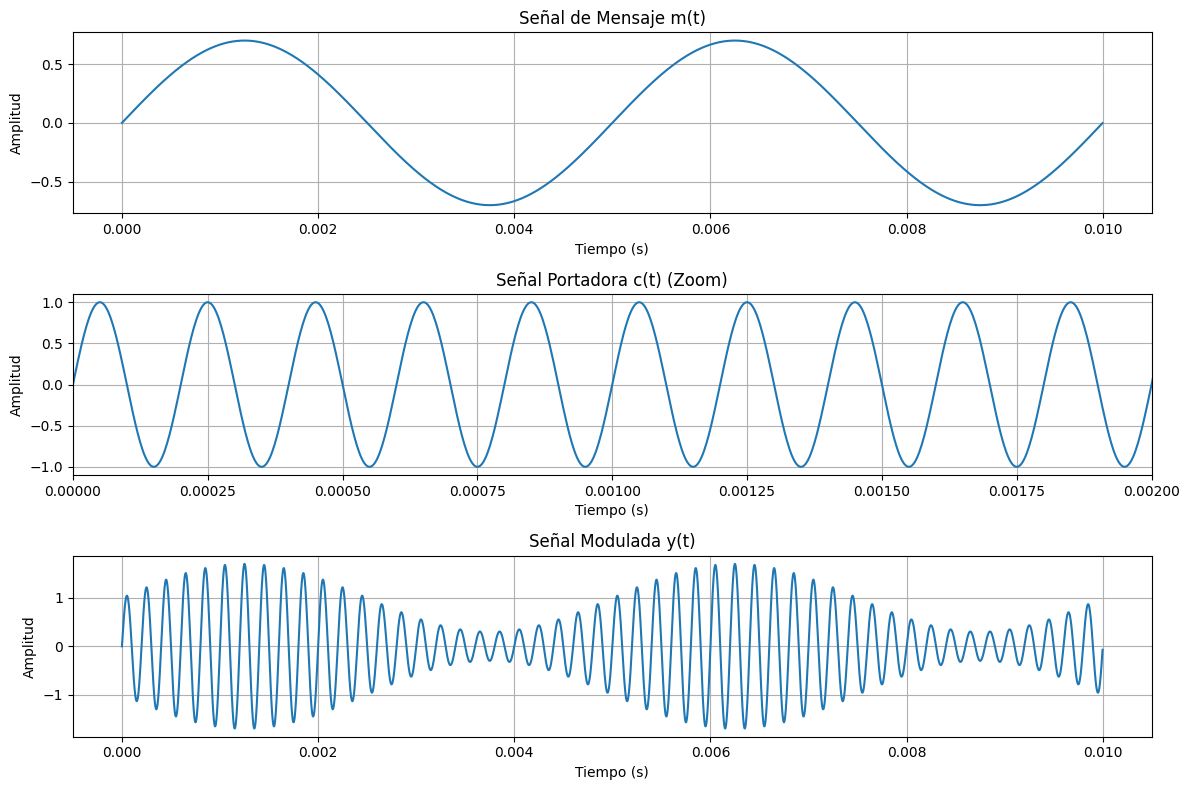

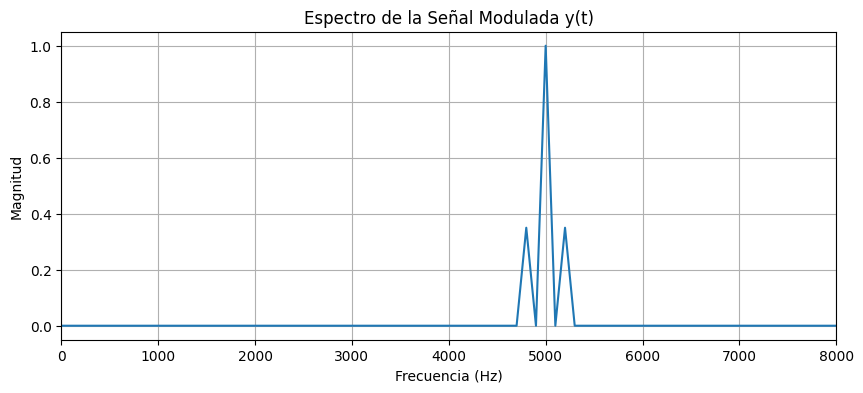

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parámetros
fs = 441000  # Frecuencia de muestreo (Hz)
t = np.linspace(0, 0.01, int(fs * 0.01), endpoint=False) # Vector de tiempo (10 ms)

# Señal de mensaje m(t)
fm = 200 # Frecuencia del mensaje (Hz)
Am = 0.7 # Amplitud del mensaje (inicial)
m_t = Am * np.sin(2 * np.pi * fm * t)

# Señal portadora c(t)
fc = 5000  # Frecuencia de la portadora (Hz)
Ac = 1.0 # Amplitud de la portadora
c_t = Ac * np.sin(2 * np.pi * fc * t)

# Señal modulada y(t) = (1 + m(t)) * c(t)
y_t = (1 + m_t) * c_t

# Graficando en el dominio del tiempo
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, m_t)
plt.title('Señal de Mensaje m(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, c_t)
plt.title('Señal Portadora c(t) (Zoom)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0, 0.002) # Zoom para ver los ciclos de la portadora
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, y_t)
plt.title('Señal Modulada y(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Graficando en el dominio de la frecuencia (Espectro de la señal modulada)
yf = fft(y_t)
xf = fftfreq(len(t), 1/fs)

# Graficar solo hasta 8 kHz
xf_plot = xf[:len(t)//2]
yf_plot = 2.0/len(t) * np.abs(yf[0:len(t)//2])

plt.figure(figsize=(10, 4))
plt.plot(xf_plot, yf_plot)
plt.title('Espectro de la Señal Modulada y(t)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, 8000) # Limitar la frecuencia a 8 kHz
plt.grid(True)
plt.show()

# Experimentar con diferentes índices de modulación (cambiar Am)
# Observar la distorsión cuando Am > 1 (sobremodulación)

# Ejemplo de cómo cambiar Am para causar sobremodulación:
# Am = 1.5 # Descomente esta línea y vuelva a ejecutar la celda para ver la sobremodulación
# m_t = Am * np.sin(2 * np.pi * fm * t)
# y_t = (1 + m_t) * c_t
# (Luego vuelva a ejecutar el código de graficación anterior para ver el efecto)

## Observaciones

- **Índice de modulación < 1**: la envolvente es clara y sigue la forma de la señal de mensaje.
- **Índice de modulación = 1**: se alcanza el límite de modulación sin distorsión.
- **Índice de modulación > 1**: aparece sobremodulación, donde la envolvente se distorsiona y puede cruzar el eje cero, dificultando la demodulación.